In [48]:

import pandas as pd
import matplotlib.pyplot as plt

import json
import os
import os.path as osp
import numpy as np
import sys
%matplotlib inline

import seaborn as sns

In [49]:
save_eval_result_dir = "/home/dwalkerhowell3/star_lab/experiments_ca-gnn-marl/eval_saves"
def models_eval_dict_to_dataframe(models_eval_dict):
    """Convert a dictionary of model evaluations to a dataframe"""
    model_dataframes = []
    for model_name, seed_files in models_eval_dict.items():
        seed_dataframes = []
        for seed_id, seed_eval_file in enumerate(seed_files):
            with open(os.path.join(save_eval_result_dir, seed_eval_file), 'r') as json_file:
                data = json.load(json_file)
                data = pd.DataFrame(data)
                seed_dataframes.append(data)
        seed_eval_df = pd.concat(seed_dataframes)
        seed_eval_df['models'] = model_name
        model_dataframes.append(seed_eval_df)
    model_dfs = pd.concat(model_dataframes)
    model_dfs = model_dfs.reset_index()
    return(model_dfs)


# Comapre Results on Seen vs. Unseen for each model



### Generalization Evaluation for 3 Robots (Unseen)

Text(0.5, 1.0, '3-robots, unseen coalitions')

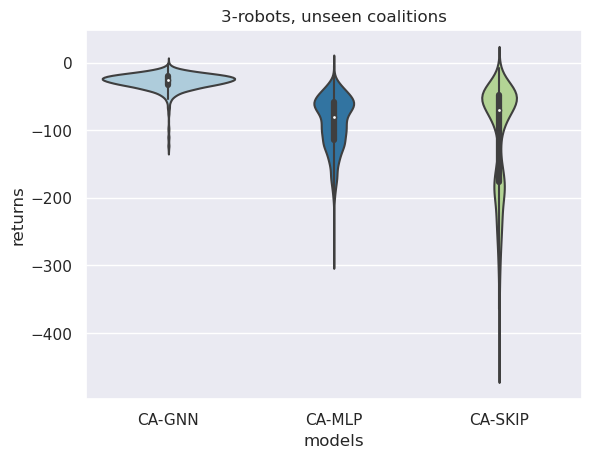

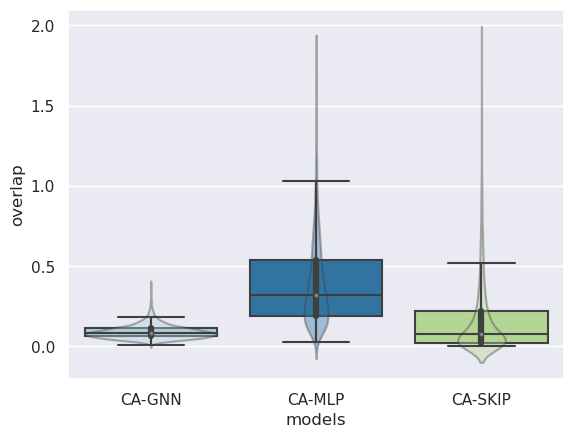

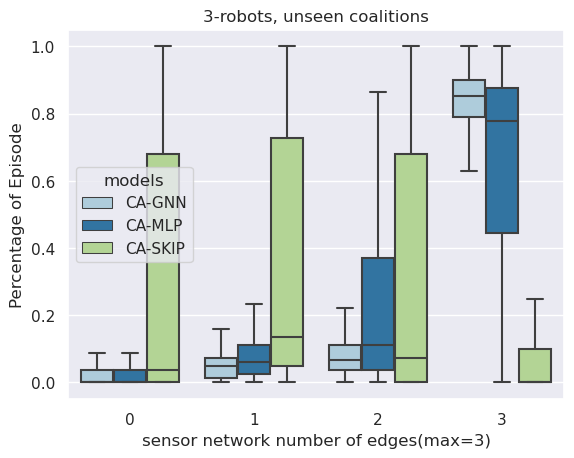

In [56]:
# Eval 1
save_eval_result_dir = "/home/dwalkerhowell3/star_lab/experiments_ca-gnn-marl/eval_saves"
models_eval_dict = {
    "CA-GNN": [
        "eval_3_agents_unseen_bc_default_SC_4_agents_HSN_sacred_run_1.json",
        "eval_3_agents_unseen_bc_default_SC_4_agents_HSN_sacred_run_2.json",
        "eval_3_agents_unseen_bc_default_SC_4_agents_HSN_sacred_run_3.json"
    ],
    "CA-MLP": [
        "eval_3_agents_unseen_bc_default_MLP_4_agents_HSN_sacred_run_1.json",
        "eval_3_agents_unseen_bc_default_MLP_4_agents_HSN_sacred_run_2.json",
        "eval_3_agents_unseen_bc_default_MLP_4_agents_HSN_sacred_run_3.json"
    ],
    "CA-SKIP": [
        "eval_3_agents_unseen_bc_default_SC_CASKIP_4_agents_HSN_sacred_run_1.json",
        "eval_3_agents_unseen_bc_default_SC_CASKIP_4_agents_HSN_sacred_run_2.json",
        "eval_3_agents_unseen_bc_default_SC_CASKIP_4_agents_HSN_sacred_run_4.json"
    ]
}

evals_df = models_eval_dict_to_dataframe(models_eval_dict)
palette=sns.color_palette("Paired")

sns.violinplot(data=evals_df, x="models", y='returns', palette=palette)
plt.title("3-robots, unseen coalitions")

fig, ax = plt.subplots()
sns.violinplot(data=evals_df, ax=ax, x="models", y="overlap", palette=palette)
plt.setp(ax.collections, alpha=.4)
sns.boxplot(data=evals_df, ax=ax, x="models", y="overlap", showfliers=False, palette=palette)


n = evals_df.shape[1]
df_exploded = evals_df.explode('connectivity', ignore_index=False)
df_exploded["Index"] = df_exploded.groupby(df_exploded.index).cumcount()

plt.figure()
sns.boxplot(data=df_exploded, x="Index", y="connectivity", hue="models", showfliers=False, palette=palette)
plt.ylabel("Percentage of Episode")
plt.xlabel("sensor network number of edges(max=%d)" % (3*(3-1)/2))
plt.title("3-robots, unseen coalitions")


### Generalization Evaluation 4 Robots (Unseen)

Text(0.5, 1.0, '4-robots, unseen coalitions')

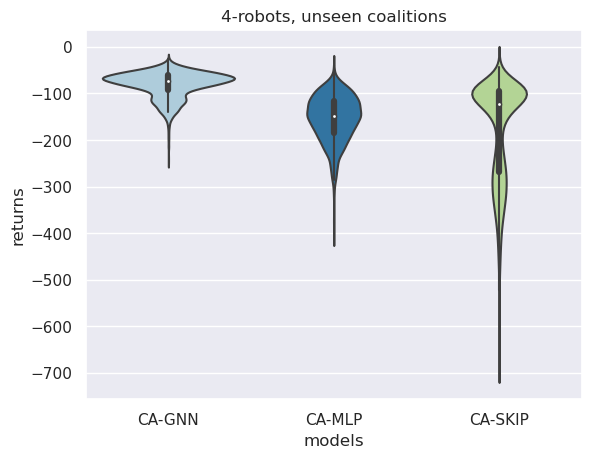

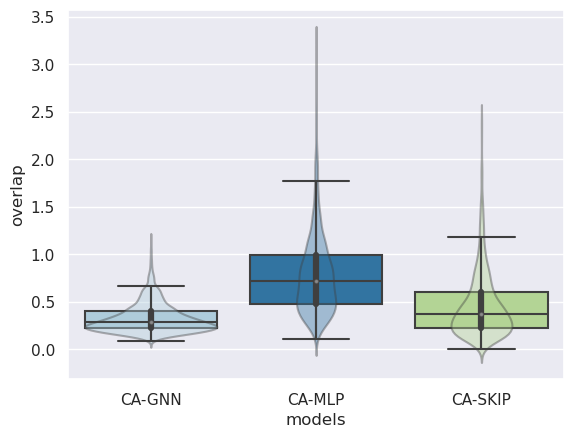

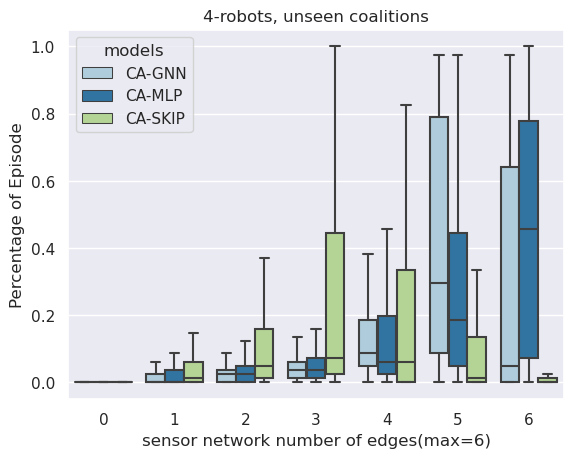

In [57]:
# Eval 2
save_eval_result_dir = "/home/dwalkerhowell3/star_lab/experiments_ca-gnn-marl/eval_saves"
models_eval_dict = {
    "CA-GNN": [
        "eval_4_agents_unseen_bc_default_SC_4_agents_HSN_sacred_run_1.json",
        "eval_4_agents_unseen_bc_default_SC_4_agents_HSN_sacred_run_2.json",
        "eval_4_agents_unseen_bc_default_SC_4_agents_HSN_sacred_run_3.json"
    ],
    "CA-MLP": [
        "eval_4_agents_unseen_bc_default_MLP_4_agents_HSN_sacred_run_1.json",
        "eval_4_agents_unseen_bc_default_MLP_4_agents_HSN_sacred_run_2.json",
        "eval_4_agents_unseen_bc_default_MLP_4_agents_HSN_sacred_run_3.json"
    ],
    "CA-SKIP": [
        "eval_4_agents_unseen_bc_default_SC_CASKIP_4_agents_HSN_sacred_run_1.json",
        "eval_4_agents_unseen_bc_default_SC_CASKIP_4_agents_HSN_sacred_run_2.json",
        "eval_4_agents_unseen_bc_default_SC_CASKIP_4_agents_HSN_sacred_run_4.json"
    ]
}

evals_df = models_eval_dict_to_dataframe(models_eval_dict)

palette=sns.color_palette("Paired")
sns.violinplot(data=evals_df, x="models", y='returns', palette=palette)
plt.title("4-robots, unseen coalitions")

fig, ax = plt.subplots()
sns.violinplot(data=evals_df, ax=ax, x="models", y="overlap", palette=palette)
plt.setp(ax.collections, alpha=.4)
sns.boxplot(data=evals_df, ax=ax, x="models", y="overlap", showfliers=False, palette=palette)


n = evals_df.shape[1]
df_exploded = evals_df.explode('connectivity', ignore_index=False)
df_exploded["Index"] = df_exploded.groupby(df_exploded.index).cumcount()

plt.figure()
sns.boxplot(data=df_exploded, x="Index", y="connectivity", hue="models", showfliers=False, palette=palette)
plt.ylabel("Percentage of Episode")
plt.xlabel("sensor network number of edges(max=%d)" % (4*(4-1)/2))
plt.title("4-robots, unseen coalitions")

### Generalization Evaluation, 4 robots (seen) vs 4 robots (unseen)

Text(0.5, 1.0, '4-robots, seen coalitions')

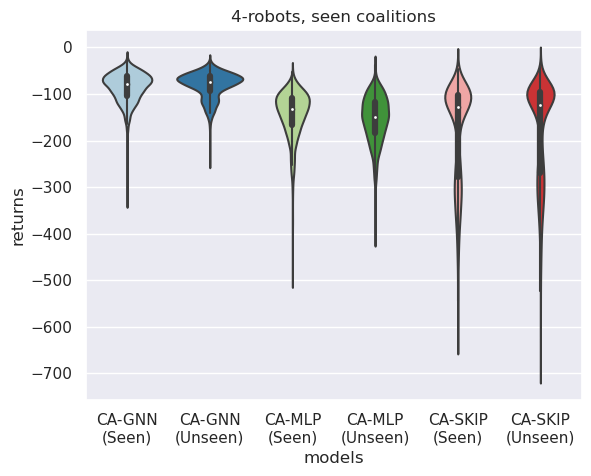

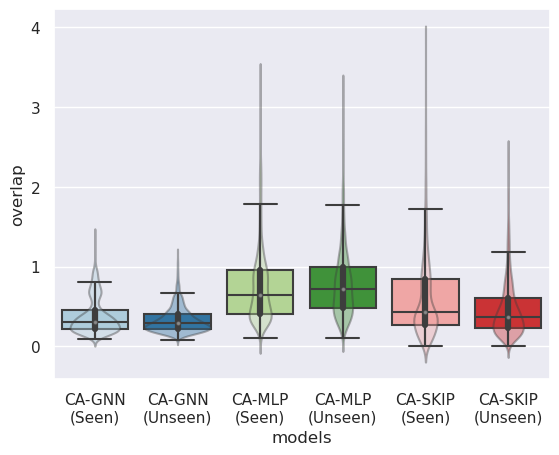

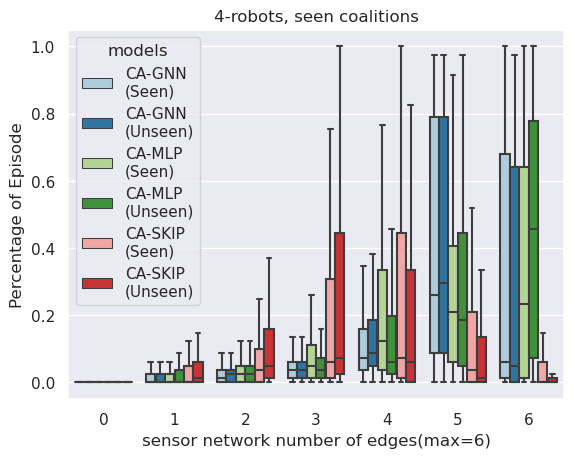

In [58]:
# Eval 2
save_eval_result_dir = "/home/dwalkerhowell3/star_lab/experiments_ca-gnn-marl/eval_saves"
models_eval_dict = {
    "CA-GNN\n(Seen)": [
        "eval_4_agents_seen_bc_default_SC_4_agents_HSN_sacred_run_1.json",
        "eval_4_agents_seen_bc_default_SC_4_agents_HSN_sacred_run_2.json",
        "eval_4_agents_seen_bc_default_SC_4_agents_HSN_sacred_run_3.json"
    ],
    "CA-GNN\n(Unseen)": [
        "eval_4_agents_unseen_bc_default_SC_4_agents_HSN_sacred_run_1.json",
        "eval_4_agents_unseen_bc_default_SC_4_agents_HSN_sacred_run_2.json",
        "eval_4_agents_unseen_bc_default_SC_4_agents_HSN_sacred_run_3.json"
    ],
    "CA-MLP\n(Seen)": [
        "eval_4_agents_seen_bc_default_MLP_4_agents_HSN_sacred_run_1.json",
        "eval_4_agents_seen_bc_default_MLP_4_agents_HSN_sacred_run_2.json",
        "eval_4_agents_seen_bc_default_MLP_4_agents_HSN_sacred_run_3.json"
    ],
    "CA-MLP\n(Unseen)": [
        "eval_4_agents_unseen_bc_default_MLP_4_agents_HSN_sacred_run_1.json",
        "eval_4_agents_unseen_bc_default_MLP_4_agents_HSN_sacred_run_2.json",
        "eval_4_agents_unseen_bc_default_MLP_4_agents_HSN_sacred_run_3.json"
    ],
    "CA-SKIP\n(Seen)": [
        "eval_4_agents_seen_bc_default_SC_CASKIP_4_agents_HSN_sacred_run_1.json",
        "eval_4_agents_seen_bc_default_SC_CASKIP_4_agents_HSN_sacred_run_2.json",
        "eval_4_agents_seen_bc_default_SC_CASKIP_4_agents_HSN_sacred_run_4.json"
    ],
    "CA-SKIP\n(Unseen)": [
        "eval_4_agents_unseen_bc_default_SC_CASKIP_4_agents_HSN_sacred_run_1.json",
        "eval_4_agents_unseen_bc_default_SC_CASKIP_4_agents_HSN_sacred_run_2.json",
        "eval_4_agents_unseen_bc_default_SC_CASKIP_4_agents_HSN_sacred_run_4.json"
    ],
    
}

evals_df = models_eval_dict_to_dataframe(models_eval_dict)

palette=sns.color_palette("Paired")

sns.violinplot(data=evals_df, x="models", y='returns', palette=palette)
plt.title("4-robots, seen coalitions")

fig, ax = plt.subplots()
sns.violinplot(data=evals_df, ax=ax, x="models", y="overlap", palette=palette)
plt.setp(ax.collections, alpha=.4)
sns.boxplot(data=evals_df, ax=ax, x="models", y="overlap", showfliers=False, palette=palette)


n = evals_df.shape[1]
df_exploded = evals_df.explode('connectivity', ignore_index=False)
df_exploded["Index"] = df_exploded.groupby(df_exploded.index).cumcount()

plt.figure()
sns.boxplot(data=df_exploded, x="Index", y="connectivity", hue="models", showfliers=False, palette=palette)
plt.ylabel("Percentage of Episode")
plt.xlabel("sensor network number of edges(max=%d)" % (4*(4-1)/2))
plt.title("4-robots, seen coalitions")

### Generalization Evaluation (5 unseen)

Text(0.5, 1.0, '5-robots, unseen coalitions')

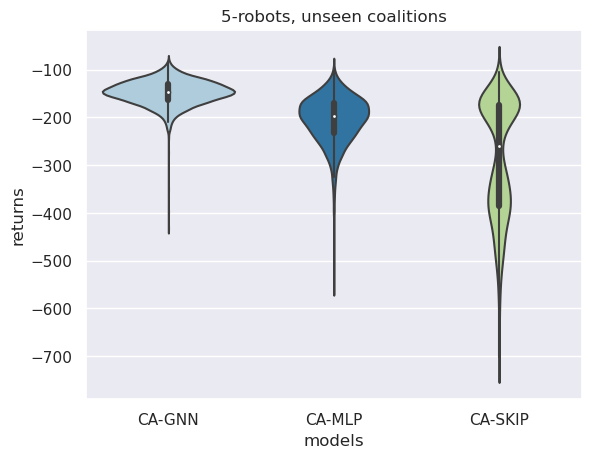

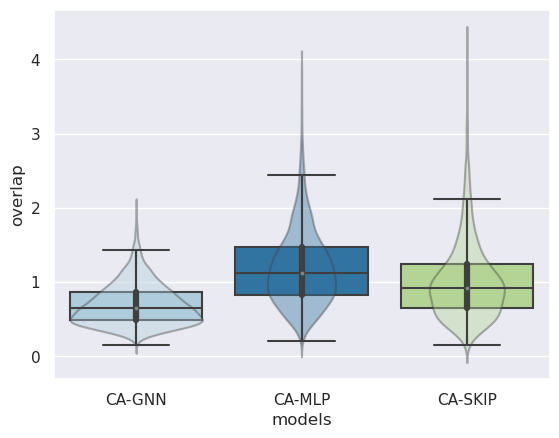

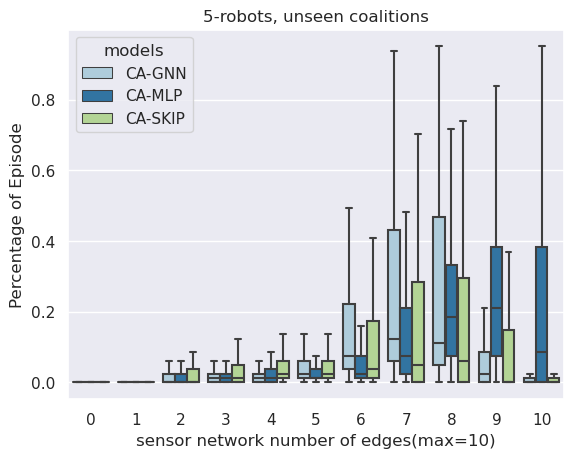

In [59]:
# Eval 3
save_eval_result_dir = "/home/dwalkerhowell3/star_lab/experiments_ca-gnn-marl/eval_saves"
models_eval_dict = {
    "CA-GNN": [
        "eval_5_agents_unseen_SC_4_agents_HSN_sacred_run_1.json",
        "eval_5_agents_unseen_SC_4_agents_HSN_sacred_run_2.json",
        "eval_5_agents_unseen_SC_4_agents_HSN_sacred_run_3.json"
    ],
    "CA-MLP": [
        "eval_5_agents_unseen_MLP_4_agents_HSN_sacred_run_1.json",
        "eval_5_agents_unseen_MLP_4_agents_HSN_sacred_run_2.json",
        "eval_5_agents_unseen_MLP_4_agents_HSN_sacred_run_3.json"
    ],
    "CA-SKIP": [
        "eval_5_agents_unseen_SC_CASKIP_4_agents_HSN_sacred_run_1.json",
        "eval_5_agents_unseen_SC_CASKIP_4_agents_HSN_sacred_run_2.json"
    ]
}

evals_df = models_eval_dict_to_dataframe(models_eval_dict)
sns.set_theme()

palette=sns.color_palette("Paired")
sns.violinplot(data=evals_df, x="models", y='returns', palette=palette)
plt.title("5-robots, unseen coalitions")

fig, ax = plt.subplots()
sns.violinplot(data=evals_df, ax=ax, x="models", y="overlap", palette=palette)
plt.setp(ax.collections, alpha=.4)
sns.boxplot(data=evals_df, ax=ax, x="models", y="overlap", showfliers=False, palette=palette)

plt.figure()

n = evals_df.shape[1]
df_exploded = evals_df.explode('connectivity', ignore_index=False)
df_exploded["Index"] = df_exploded.groupby(df_exploded.index).cumcount()

sns.boxplot(data=df_exploded, x="Index", y="connectivity", hue="models",showfliers=False, palette=palette)
plt.ylabel("Percentage of Episode")
plt.xlabel("sensor network number of edges(max=%d)" % (5*(5-1)/2))
plt.title("5-robots, unseen coalitions")

### Generalization Evaluation (Agent ID versus Capability Awareness)

Text(0.5, 1.0, '4-robots, unseen coalitions')

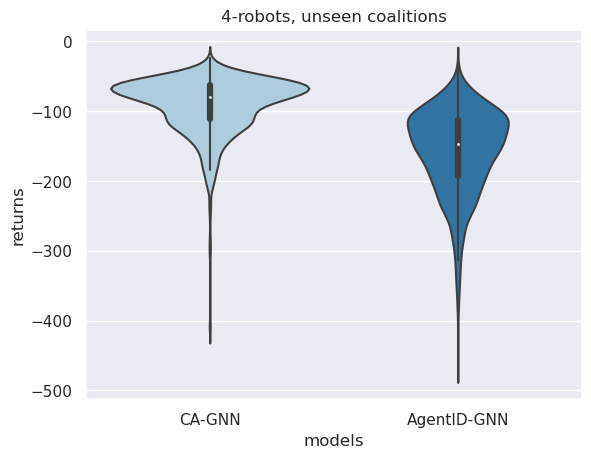

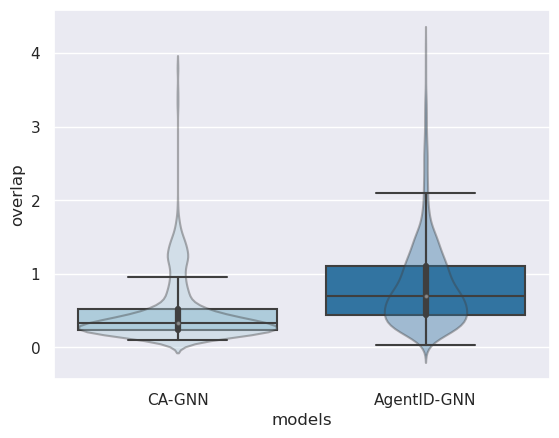

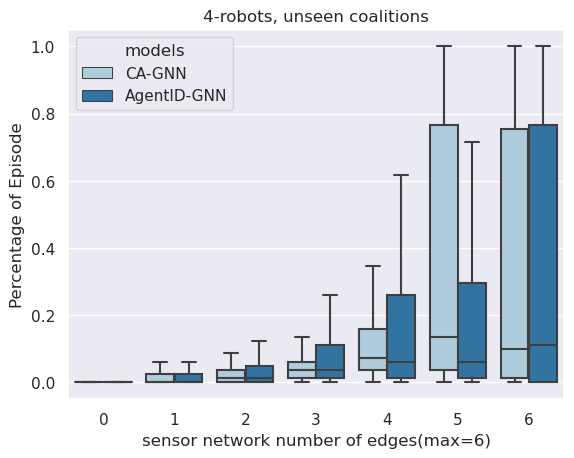

In [63]:
# Eval 3
save_eval_result_dir = "/home/dwalkerhowell3/star_lab/experiments_ca-gnn-marl/eval_saves"
models_eval_dict = {
    "CA-GNN": [
        "eval_4_agents_CA_unseen_bc_default_SC_4_agents_HSN_sacred_run_1.json",
        "eval_4_agents_CA_unseen_bc_default_SC_4_agents_HSN_sacred_run_2.json",
        "eval_4_agents_CA_unseen_bc_default_SC_4_agents_HSN_sacred_run_3.json"
    ],
    "AgentID-GNN": [
        "eval_4_agents_ID_unseen_bc_default_SC_ID_4_agents_REDO_sacred_run_1.json",
        "eval_4_agents_ID_unseen_bc_default_SC_ID_4_agents_REDO_sacred_run_2.json",
        "eval_4_agents_ID_unseen_bc_default_SC_ID_4_agents_REDO_sacred_run_3.json"
    ]
}

evals_df = models_eval_dict_to_dataframe(models_eval_dict)

sns.set_theme()
palette = sns.set_palette("Paired")
sns.violinplot(data=evals_df, x="models", y='returns', palette=palette)
plt.title("4-robots, unseen coalitions")

fig, ax = plt.subplots()
sns.violinplot(data=evals_df, ax=ax, x="models", y="overlap")
plt.setp(ax.collections, alpha=.4)
sns.boxplot(data=evals_df, ax=ax, x="models", y="overlap", showfliers=False, palette=palette)

plt.figure()

n = evals_df.shape[1]
df_exploded = evals_df.explode('connectivity', ignore_index=False)
df_exploded["Index"] = df_exploded.groupby(df_exploded.index).cumcount()

sns.boxplot(data=df_exploded, x="Index", y="connectivity", hue="models",showfliers=False, palette=palette)
plt.ylabel("Percentage of Episode")
plt.xlabel("sensor network number of edges(max=%d)" % (4*(4-1)/2))
plt.title("4-robots, unseen coalitions")

### Generalization Evaluation (CA vs AGent ID, No barrier certificates)

Text(0.5, 0, 'sensor network number of edges(max=6)')

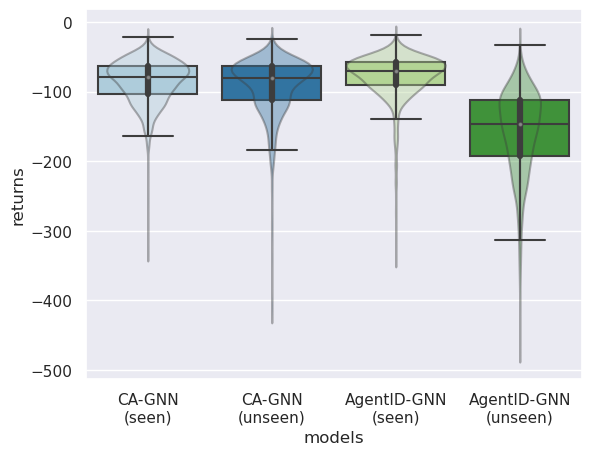

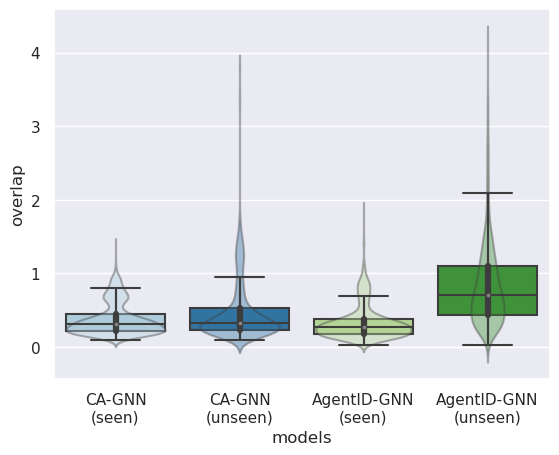

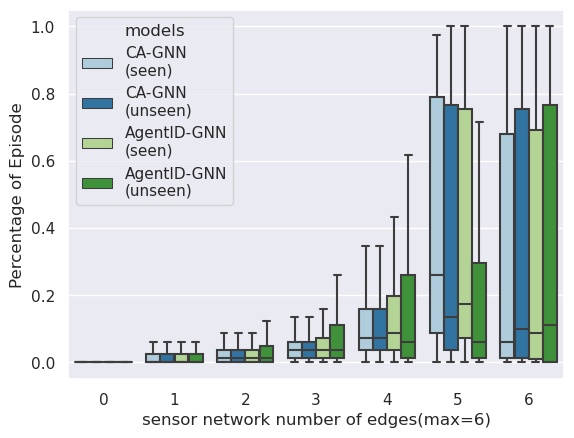

In [67]:
# Eval 3
save_eval_result_dir = "/home/dwalkerhowell3/star_lab/experiments_ca-gnn-marl/eval_saves"
models_eval_dict = {
    "CA-GNN\n(seen)": [
        "eval_4_agents_seen_bc_default_SC_4_agents_HSN_sacred_run_1.json",
        "eval_4_agents_seen_bc_default_SC_4_agents_HSN_sacred_run_2.json",
        "eval_4_agents_seen_bc_default_SC_4_agents_HSN_sacred_run_3.json"
    ],
    "CA-GNN\n(unseen)": [
        "eval_4_agents_CA_unseen_bc_default_SC_4_agents_HSN_sacred_run_1.json",
        "eval_4_agents_CA_unseen_bc_default_SC_4_agents_HSN_sacred_run_2.json",
        "eval_4_agents_CA_unseen_bc_default_SC_4_agents_HSN_sacred_run_3.json"
    ],
    "AgentID-GNN\n(seen)": [
        "eval_4_agents_ID_seen_bc_default_SC_ID_4_agents_REDO_sacred_run_1.json",
        "eval_4_agents_ID_seen_bc_default_SC_ID_4_agents_REDO_sacred_run_2.json",
        "eval_4_agents_ID_seen_bc_default_SC_ID_4_agents_REDO_sacred_run_3.json"
    ],
    "AgentID-GNN\n(unseen)": [
        "eval_4_agents_ID_unseen_bc_default_SC_ID_4_agents_REDO_sacred_run_1.json",
        "eval_4_agents_ID_unseen_bc_default_SC_ID_4_agents_REDO_sacred_run_2.json",
        "eval_4_agents_ID_unseen_bc_default_SC_ID_4_agents_REDO_sacred_run_3.json"
    ],
    
}

evals_df = models_eval_dict_to_dataframe(models_eval_dict)
fig, ax = plt.subplots()
sns.set_theme()
palette=sns.color_palette("Paired")
sns.violinplot(data=evals_df, ax=ax, x="models", y='returns', palette=palette)
plt.setp(ax.collections, alpha=.4)
sns.boxplot(data=evals_df, ax=ax, x="models", y='returns', palette=palette, showfliers=False)
# plt.title("4-robots, unseen coalitions")

fig, ax = plt.subplots()
sns.violinplot(data=evals_df, ax=ax, x="models", y="overlap", palette=palette)
plt.setp(ax.collections, alpha=.4)
sns.boxplot(data=evals_df, ax=ax, x="models", y="overlap", showfliers=False, palette=palette)

plt.figure()

n = evals_df.shape[1]
df_exploded = evals_df.explode('connectivity', ignore_index=False)
df_exploded["Index"] = df_exploded.groupby(df_exploded.index).cumcount()

sns.boxplot(data=df_exploded, x="Index", y="connectivity", hue="models",showfliers=False, palette=palette)
plt.ylabel("Percentage of Episode")
plt.xlabel("sensor network number of edges(max=%d)" % (4*(4-1)/2))
# plt.title("4-robots, unseen coalitions")